Estimated clusters: 4
Noise points: 69
Silhouette Score: 0.250


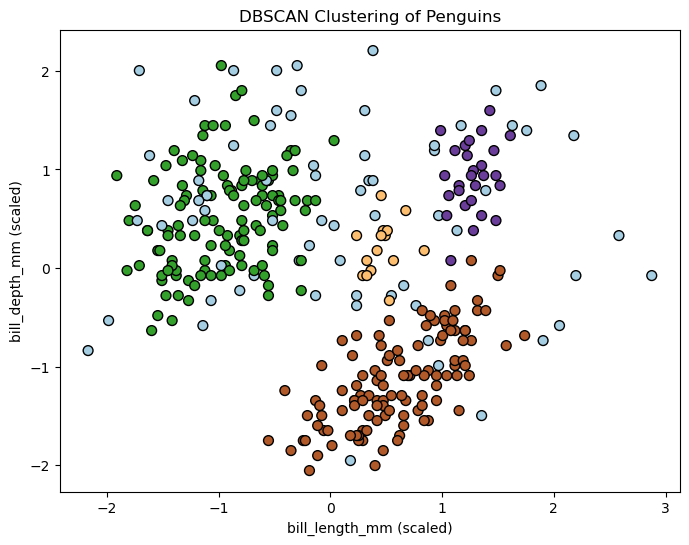

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Load & clean data (example: Palmer Penguins)
df = sns.load_dataset("penguins")
df = df.dropna(subset=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])

# 2. Select features for clustering
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values

# 3. Standardize features (important for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Fit DBSCAN
#    eps = neighborhood radius (in scaled units)
#    min_samples = min points to form a dense region
db = DBSCAN(eps=0.5, min_samples=5, metric="euclidean")
labels = db.fit_predict(X_scaled)  
#   labels = -1 denotes noise points

# 5. Attach cluster labels back to DataFrame
df["dbscan_cluster"] = labels

# 6. Evaluate (optional)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)
print(f"Estimated clusters: {n_clusters}")
print(f"Noise points: {n_noise}")
if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {sil_score:.3f}")

# 7. Visualize (first two principal features)
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:,0], X_scaled[:,1],
    c=labels, cmap="Paired", s=50, edgecolor="k"
)
plt.xlabel("bill_length_mm (scaled)")
plt.ylabel("bill_depth_mm (scaled)")
plt.title("DBSCAN Clustering of Penguins")
plt.show()
